In [26]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , Activation
import matplotlib.pyplot as plt

In [9]:
batch_size = 64
num_classes = 10
epochs = 30
img_h, img_w = 28, 28   # image dimensions

# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
print(X_train.shape)
print(y_train.shape)


(60000, 784)
(60000,)


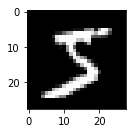

In [11]:

plt.subplot(221)
plt.imshow(X_train[0] , cmap = plt.get_cmap('gray'))
plt.show()

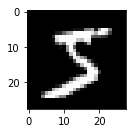

In [34]:
plt.subplot(222)
plt.imshow(X_train[0] , cmap = plt.get_cmap('gray'))
plt.show()

In [12]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [14]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [34]:
# one-hot encoding using keras' numpy-related utilities
from keras.utils import np_utils
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [72]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [83]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [84]:
import time
start = time.time()

history = model.fit(X_train, Y_train,
          batch_size=500, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
print(end - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 22s - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0881 - val_acc: 0.9829
Epoch 2/20
 - 21s - loss: 0.0079 - acc: 0.9973 - val_loss: 0.0854 - val_acc: 0.9854
Epoch 3/20
 - 23s - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0850 - val_acc: 0.9858
Epoch 4/20
 - 21s - loss: 0.0082 - acc: 0.9975 - val_loss: 0.0848 - val_acc: 0.9851
Epoch 5/20
 - 21s - loss: 0.0076 - acc: 0.9977 - val_loss: 0.0843 - val_acc: 0.9852
Epoch 6/20
 - 21s - loss: 0.0084 - acc: 0.9975 - val_loss: 0.0811 - val_acc: 0.9856
Epoch 7/20
 - 21s - loss: 0.0071 - acc: 0.9979 - val_loss: 0.0835 - val_acc: 0.9843
Epoch 8/20
 - 21s - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0905 - val_acc: 0.9850
Epoch 9/20
 - 21s - loss: 0.0047 - acc: 0.9985 - val_loss: 0.0889 - val_acc: 0.9841
Epoch 10/20
 - 21s - loss: 0.0084 - acc: 0.9974 - val_loss: 0.0834 - val_acc: 0.9859
Epoch 11/20
 - 23s - loss: 0.0072 - acc: 0.9977 - val_loss: 0.0801 - val_acc: 0.9841
Epoch 12/20
 - 25s - los

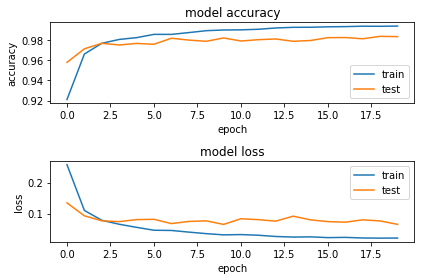

In [78]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [22]:
import os
save_dir = 'C:/Users/Luan/Documents/'
model_name = 'MNIST_KERAS.h5'
model_path = os.path.join(save_dir , model_name)
model.save(model_path)

In [ ]:
model = load_model(model_path)

In [85]:

loss_and_metrics = model.evaluate(X_test , y_test , verbose = 2)

print('test loss ' , loss_and_metrics[0])
print('test accurancy' , loss_and_metrics[1])

test loss  0.07067363798904439
test accurancy 0.9857


In [87]:
predict = model.predict_classes(X_test)

E:\dev\Anaconda3\envs\keras_with_python3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


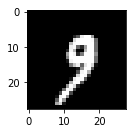

9


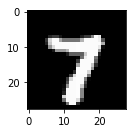

7


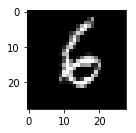

6


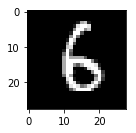

6


In [90]:
plt.subplot(223)
plt.imshow(X_test[1000].reshape(28,28) , cmap = plt.get_cmap('gray'))
plt.show()
print(predict[1000])

plt.subplot(224)
plt.imshow(X_test[1100].reshape(28,28) , cmap = plt.get_cmap('gray'))
plt.show()
print(predict[1100])

plt.subplot(221)
plt.imshow(X_test[2000].reshape(28,28) , cmap = plt.get_cmap('gray'))
plt.show()
print(predict[2000])

plt.subplot(222)
plt.imshow(X_test[3000].reshape(28,28) , cmap = plt.get_cmap('gray'))
plt.show()
print(predict[3000])